## NEURAL NETWORK 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [12]:
df= pd.read_csv(r"C:\Users\devra\Desktop\Neural_Network\DATA SET\train.csv")

In [13]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df = np.array(df)

In [42]:
m, n = df.shape
np.random.shuffle(df)

data_div = df[0:1000].T
Y_div= data_div[0]
X_div = data_div[1:n]
X_div = X_div / 255

data_train = df[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255


pixel values typically range from 0 to 255, where 0 represents black and 255 represents white. Normalizing these values to be between 0 and 1 (by dividing by 255) can help the model converge faster during training and prevent issues like exploding gradients.

In [43]:
Y_train

array([6, 8, 0, ..., 5, 7, 7], dtype=int64)

In [44]:
X_train[:,0].shape

(784,)

In [45]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [46]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 6 6 ... 5 8 4] [6 8 0 ... 5 7 7]
0.12663414634146342
Iteration:  10
[6 7 6 ... 5 7 0] [6 8 0 ... 5 7 7]
0.1815609756097561
Iteration:  20
[6 7 1 ... 5 7 0] [6 8 0 ... 5 7 7]
0.2569268292682927
Iteration:  30
[6 7 1 ... 5 7 0] [6 8 0 ... 5 7 7]
0.3225609756097561
Iteration:  40
[6 8 7 ... 5 7 0] [6 8 0 ... 5 7 7]
0.3912926829268293
Iteration:  50
[6 8 7 ... 5 7 0] [6 8 0 ... 5 7 7]
0.4465609756097561
Iteration:  60
[6 8 7 ... 5 7 9] [6 8 0 ... 5 7 7]
0.4956829268292683
Iteration:  70
[6 8 7 ... 5 7 9] [6 8 0 ... 5 7 7]
0.5370975609756098
Iteration:  80
[6 8 9 ... 5 7 9] [6 8 0 ... 5 7 7]
0.5716097560975609
Iteration:  90
[6 8 9 ... 5 7 9] [6 8 0 ... 5 7 7]
0.600390243902439
Iteration:  100
[6 8 9 ... 5 7 9] [6 8 0 ... 5 7 7]
0.6253658536585366
Iteration:  110
[6 8 9 ... 5 7 9] [6 8 0 ... 5 7 7]
0.6454146341463415
Iteration:  120
[6 8 5 ... 5 7 7] [6 8 0 ... 5 7 7]
0.6622439024390244
Iteration:  130
[6 8 5 ... 5 7 7] [6 8 0 ... 5 7 7]
0.679609756097561
Iteration:  140
[6

In [50]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


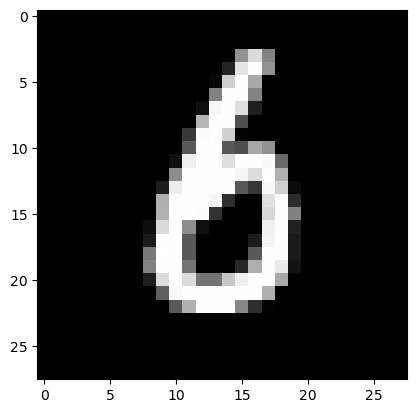

In [51]:
test_prediction(3, W1, b1, W2, b2)

Prediction:  [3]
Label:  5


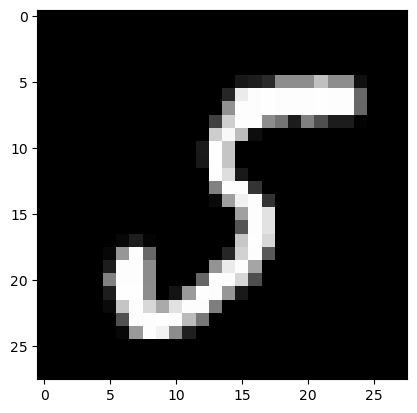

In [52]:
test_prediction(6, W1, b1, W2, b2)

Prediction:  [4]
Label:  4


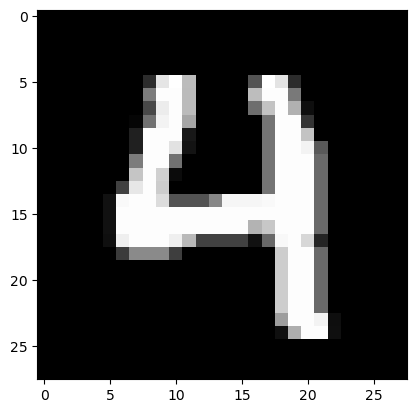

In [55]:
test_prediction(8, W1, b1, W2, b2)

In [56]:
div_predictions = make_predictions(X_div, W1, b1, W2, b2)
get_accuracy(div_predictions, Y_div)

[1 8 9 9 6 9 6 2 5 8 7 0 0 6 5 3 0 0 9 2 9 4 0 5 7 0 8 7 2 1 3 1 9 5 0 6 3
 9 4 7 0 0 9 1 7 9 4 1 3 1 8 3 1 7 3 8 1 7 9 5 9 7 3 4 5 3 1 2 8 8 7 2 8 3
 5 4 6 1 7 8 6 5 9 5 0 9 3 1 0 7 1 4 7 0 6 5 3 6 9 2 6 0 7 3 5 2 1 2 5 5 9
 9 0 3 1 8 2 5 1 4 7 0 1 8 7 5 2 7 5 0 7 2 4 1 6 7 9 5 9 8 7 3 5 0 1 3 8 4
 0 1 6 5 6 2 1 0 3 4 4 4 7 7 2 9 9 8 0 0 2 1 8 6 3 4 8 8 6 9 8 4 9 2 8 2 3
 7 7 1 2 0 2 7 4 5 9 1 8 1 5 9 3 6 6 1 9 8 2 1 3 2 4 9 6 2 5 3 0 9 4 8 9 3
 7 0 9 8 4 3 0 6 4 6 5 4 0 2 7 4 6 4 4 7 0 8 5 3 6 3 3 7 8 3 9 3 0 0 7 3 8
 7 5 7 9 2 6 9 4 5 4 9 3 1 7 2 4 6 0 5 1 0 2 0 5 8 3 0 8 0 5 3 2 0 1 6 0 8
 2 3 9 7 4 5 6 2 5 8 2 9 2 7 9 6 7 4 9 3 3 7 6 7 7 6 9 6 6 9 3 8 3 9 1 2 5
 7 9 8 0 7 5 7 6 6 5 6 7 9 0 6 9 1 7 8 1 8 8 1 3 7 4 2 1 5 3 2 9 5 8 6 1 2
 5 3 9 7 8 1 5 7 4 7 5 7 7 2 7 6 3 8 7 1 8 5 4 4 1 2 6 9 4 1 1 7 3 4 5 9 6
 3 5 1 5 0 3 3 0 9 2 9 6 9 2 2 0 1 3 2 4 5 6 0 0 2 0 4 3 1 7 2 1 1 2 0 6 1
 3 1 2 4 4 5 5 7 0 3 1 0 9 1 5 8 5 2 6 1 9 1 2 3 9 3 3 5 6 5 7 5 8 1 7 9 9
 9 9 0 4 6 8 9 4 4 3 8 1 

0.844